In [13]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

Image:20230513_190534gl.jpg

Consider the input image 20230513_190534gl.jpg. We will refer to it as b. Apply a 5x5
Gaussian filter, denoted as hGLP, to image b. The results of this operation will be labeled as
bGLP. Calculate the power and entropy for both images b and bGLP.  

In [14]:
# functions from utils_2023.ipynb

# function to compute the entropy of an image. 
# nimg is the input image and N is the number of graylevels, default is 256
# nimg is supposed to be a graylevel image.
#
def am_entropy(nimg , N=256):
    M = nimg.shape
    ssz = M[0] * M[1]
    hist,bins = np.histogram(nimg.flatten(),N,[0,N])
    hist = hist / ssz
    ent = -np.sum( hist * np.log2(hist+0.000001))
    return ent

# function to compute the image power. input could be graylevel or color. 
#
def am_power(a):
    dim1 = a.shape
    
    if len(dim1)==2:
        sz = dim1[0] * dim1[1] 
    elif len(dim1)==3:
        sz = dim1[0] * dim1[1] * dim1[2]        
    pa = np.sum( a ** 2.0) / sz    
    
    return pa

gausslp = 1/273 * np.array([[1, 4, 7, 4, 1], [4, 16, 26, 16, 4], [7, 26, 41, 26, 7], [4, 16, 26, 16, 4], [1, 4, 7, 4, 1]])
print(gausslp)

[[0.003663   0.01465201 0.02564103 0.01465201 0.003663  ]
 [0.01465201 0.05860806 0.0952381  0.05860806 0.01465201]
 [0.02564103 0.0952381  0.15018315 0.0952381  0.02564103]
 [0.01465201 0.05860806 0.0952381  0.05860806 0.01465201]
 [0.003663   0.01465201 0.02564103 0.01465201 0.003663  ]]


Power of b = 9148.340999416667
Entropy of b = 17.29080029927725
---------------------------------------
Power of b after filter= 8787.92350775
Entropy of b after filter = 17.166695908240808
Ratio of power = 0.9606029670636842
Ratio of entropy = 0.9928225189760805


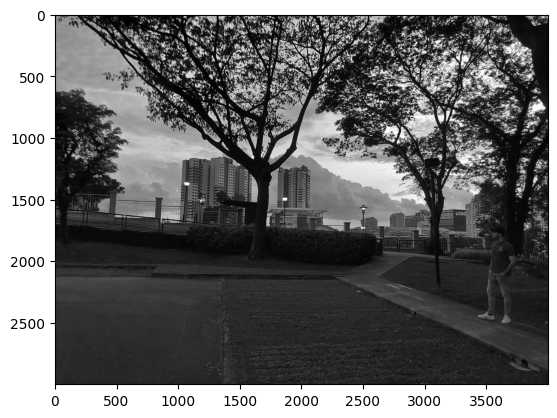

In [24]:
im_file = '../CS4243_2023_images_small/20230513_190534gl.jpg'
b = cv2.imread(im_file)
plt.imshow(b)
powerb = am_power(b)
entropyb = am_entropy(b)

bfiltered = cv2.filter2D(src = b, ddepth = -1, kernel = gausslp)
powerbf = am_power(bfiltered)
entropybf = am_entropy(bfiltered)

print('Power of b =', powerb)
print('Entropy of b =', entropyb)
print('---------------------------------------')
print('Power of b after filter=', powerbf)
print('Entropy of b after filter =', entropybf)
print('Ratio of power =', powerbf / powerb)
print('Ratio of entropy =', entropybf / entropyb)

Power of c = 16307.88450275
Entropy of c = 17.500435442275403
---------------------------------------
Power of c after filter= 16282.990728583334
Entropy of c after filter = 17.381822036650878
Ratio of power = 0.9984735129708291
Ratio of entropy = 0.9932222597537205


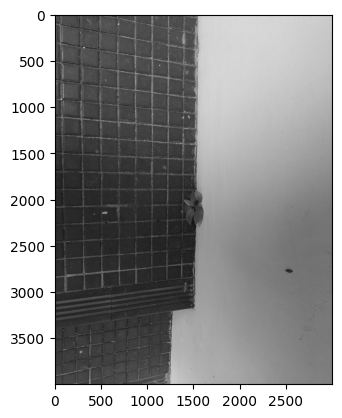

In [25]:
im_file = '../CS4243_2023_images_small/20230324_105524gl.jpg'
c = cv2.imread(im_file)
plt.imshow(c)
powerc = am_power(c)
entropyc = am_entropy(c)

cfiltered = cv2.filter2D(src = c, ddepth = -1, kernel = gausslp)
powercf = am_power(cfiltered)
entropycf = am_entropy(cfiltered)

print('Power of c =', powerc)
print('Entropy of c =', entropyc)
print('---------------------------------------')
print('Power of c after filter=', powercf)
print('Entropy of c after filter =', entropycf)
print('Ratio of power =', powercf / powerc)
print('Ratio of entropy =', entropycf / entropyc)

Conclusion: answer is (a) in Canvas